<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [4]:
df=pd.read_csv('supermarket_sales.csv')

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_12100\3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [9]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\Acer\AppData\Local\Temp\ipykernel_12100\1900210813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


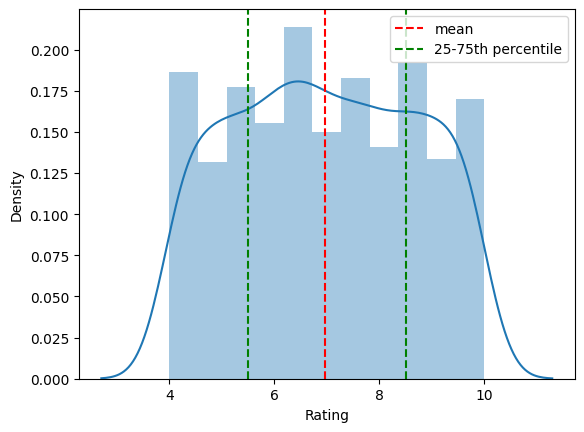

In [12]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

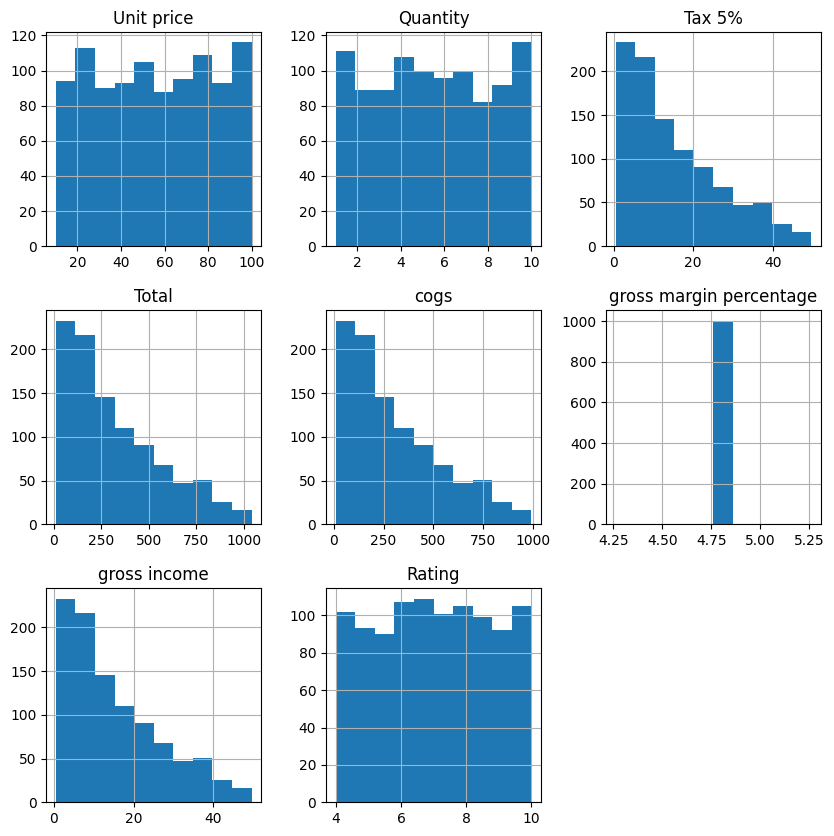

In [13]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<Axes: xlabel='Branch', ylabel='count'>

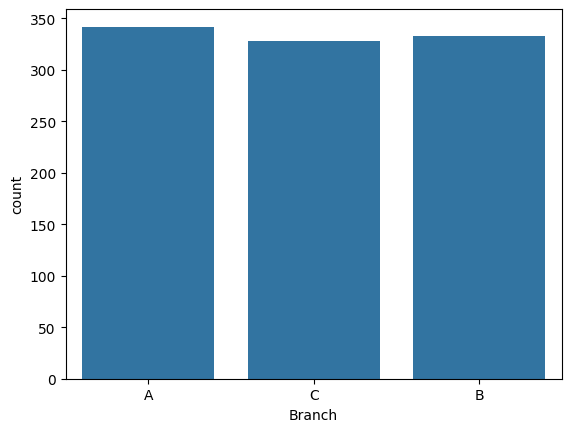

In [14]:
sns.countplot(x='Branch',data=df)

In [15]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

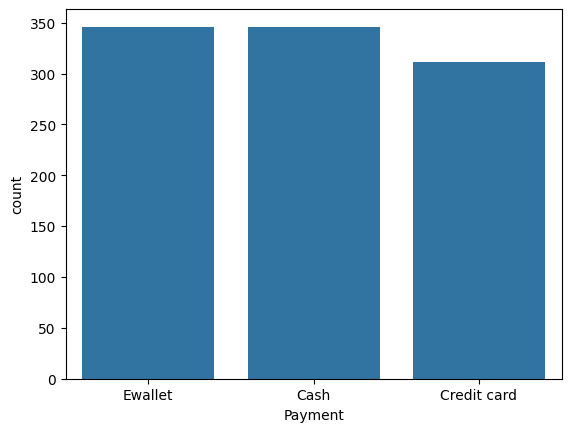

In [15]:
sns.countplot(x='Payment',data=df)

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

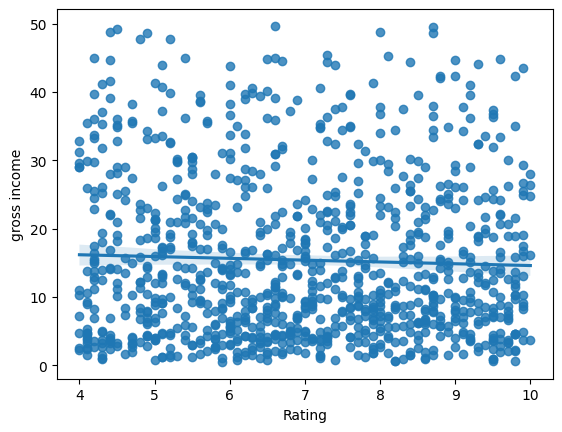

In [16]:
sns.regplot(x="Rating", y="gross income", data=df)

<Axes: xlabel='Branch', ylabel='gross income'>

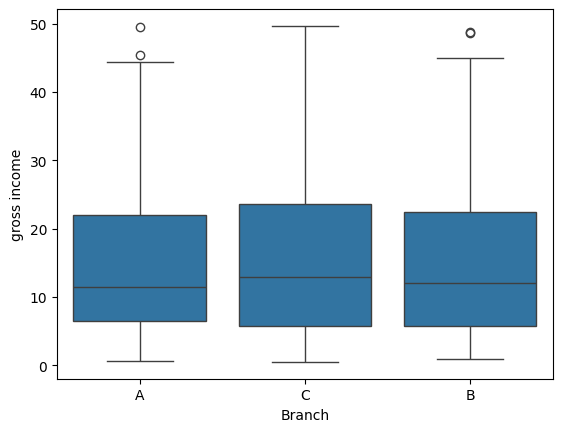

In [17]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

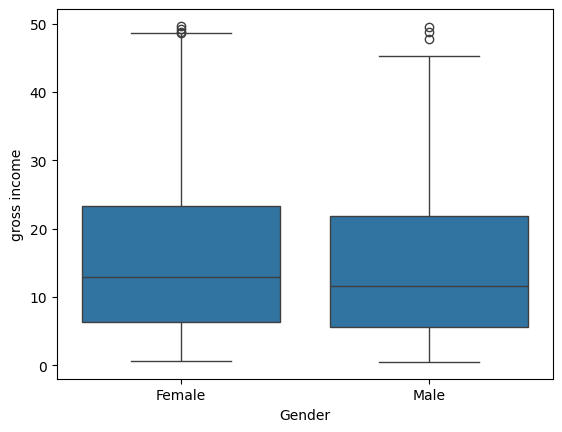

In [18]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

**Question 4:** Is there a noticeable time trend in gross income?

In [19]:
df.groupby(df.index).mean(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


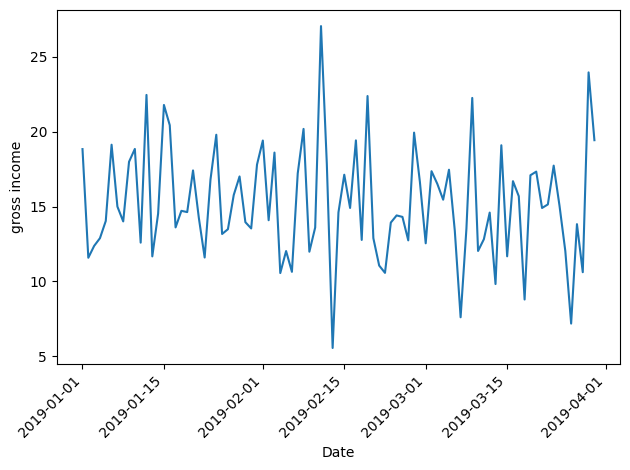

In [20]:
sns.lineplot(x=df.groupby(df.index).mean(numeric_only=True).index,y=df.groupby(df.index).mean(numeric_only=True)['gross income'])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

### Task 4: Dealing With Duplicate Rows and Missing Values

In [21]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [22]:
df.duplicated().sum()

np.int64(3)

In [23]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<Axes: ylabel='Date'>

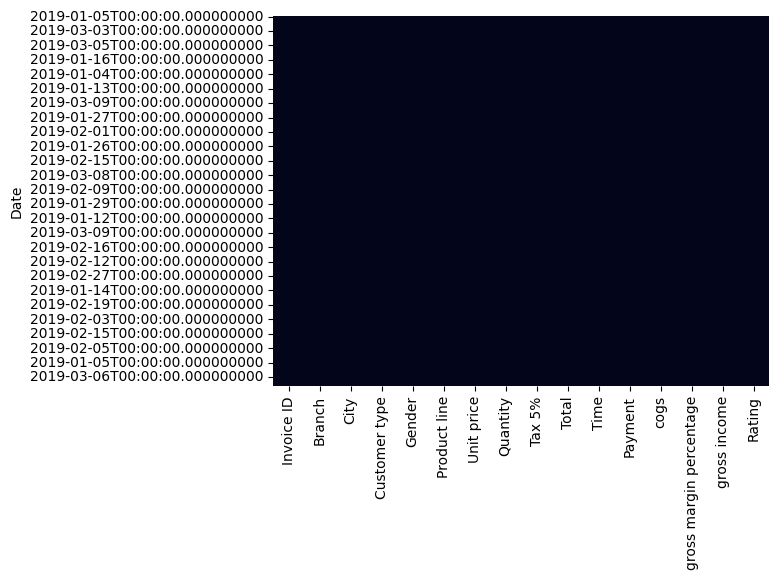

In [34]:
sns.heatmap(df.isnull(),cbar=False)

In [27]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [28]:
df.fillna(df.mode().iloc[0],inplace=True)

### Task 5: Correlation Analysis

In [33]:
np.round(df.corr(numeric_only=True),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.70,0.70,0.70,NaN,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<Axes: >

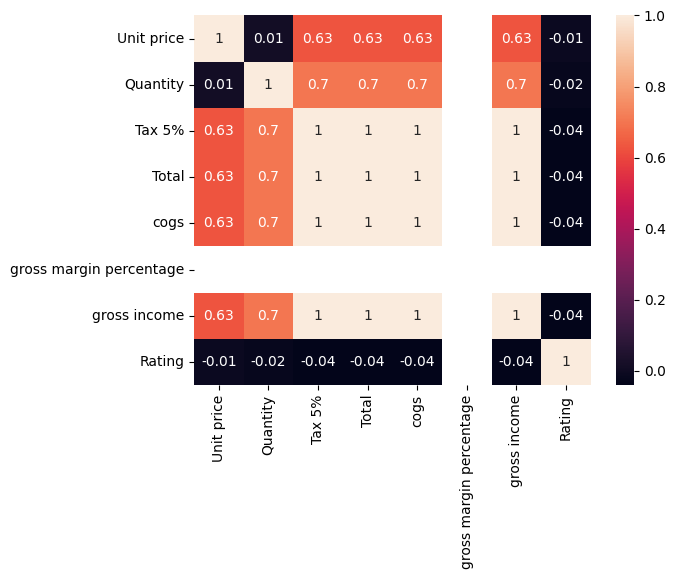

In [30]:
sns.heatmap(np.round(df.corr(numeric_only=True),2),annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/